# **Predict Stroke**

- Import Library

In [106]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping


- Load Data

In [117]:
df = pd.read_csv('../dataset/housing.csv')

In [118]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Preprocessing

- Handling Missing & Duplicated Values

In [119]:
df.duplicated().sum()

np.int64(0)

In [120]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [121]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
numeric = df.select_dtypes(include=['number']).columns
for i in numeric:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[i] < lower) | (df[i] > upper)]
    print(f"Kolom '{i}': {len(outliers)} outlier") 

Kolom 'longitude': 0 outlier
Kolom 'latitude': 0 outlier
Kolom 'housing_median_age': 0 outlier
Kolom 'total_rooms': 1287 outlier
Kolom 'total_bedrooms': 1271 outlier
Kolom 'population': 1196 outlier
Kolom 'households': 1220 outlier
Kolom 'median_income': 681 outlier
Kolom 'median_house_value': 1071 outlier


TypeError: unsupported operand type(s) for -: 'str' and 'str'

- Feature Engineering

## Modelling & Evaluation

In [ ]:
model = Sequential([
    Dense(128, activation='relu',input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu' ),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early = EarlyStopping(patience=5, restore_best_weights=True)
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early])

Epoch 1/10


d:\ML\ML-PredictNumerical\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5304 - loss: 0.9536 - val_accuracy: 0.9600 - val_loss: 0.4148
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9047 - loss: 0.3957 - val_accuracy: 0.9750 - val_loss: 0.1019
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9717 - loss: 0.1578 - val_accuracy: 0.9950 - val_loss: 0.0348
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9793 - loss: 0.0741 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9950 - loss: 0.0369 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9959 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9980 - loss: 0.0184 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 9.7340e-0

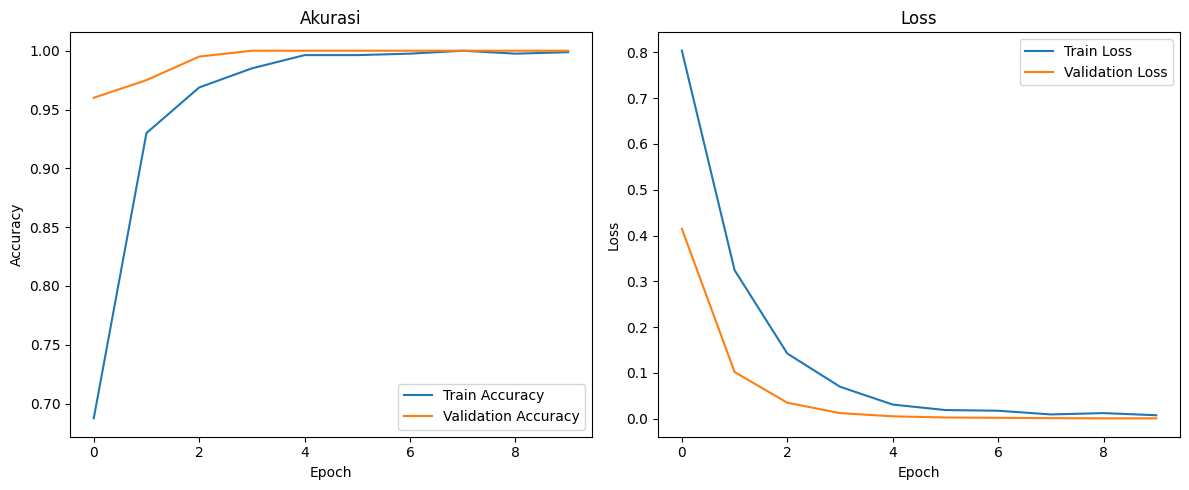

In [ ]:
# plt.figure(figsize=(12, 5))

# # Accuracy plot
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Akurasi')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# # Loss plot
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:
# X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# cnn_model = Sequential([
#     Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
#     MaxPooling1D(pool_size=2),
#     GlobalAveragePooling1D(),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# cnn_model.fit(X_train_cnn, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20


d:\ML\ML-PredictNumerical\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9518 - loss: 0.4005 - val_accuracy: 0.9580 - val_loss: 0.1825
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9499 - loss: 0.2163 - val_accuracy: 0.9580 - val_loss: 0.1621
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9496 - loss: 0.1994 - val_accuracy: 0.9580 - val_loss: 0.1539
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9530 - loss: 0.1856 - val_accuracy: 0.9580 - val_loss: 0.1520
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9521 - loss: 0.1820 - val_accuracy: 0.9580 - val_loss: 0.1486
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9470 - loss: 0.1939 - val_accuracy: 0.9580 - val_loss: 0.1504
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9430 - loss: 0.2043 - val_accuracy: 0.9580 - val_loss: 0.1479
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9437 - loss: 0.2033 - val_accuracy: 0.9580 - val_loss: 0.1493
Epo

## Predict